## Vincent Roy
**ID : 119244546**


# Assignment 2
### General Instructions
  + The Python standard library is not enough to do solve these questions. You will need to import appropriate libraries for each task. Generally, you might import and use any library you wish unless otherwise stated. 
  + Where detail instructions like variable or function names, required libraries, and etc are not given by the question, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + When you are required to explain or answer in text format open a Markdown cell and enter your answer in it.
  + Do not remove or modify the original cells provided by the instructor.
  + Comment your code whenever needed using # sign at the beginning of the row.
  + Do not hesitate to communicate your questions to the TAs or instructors. Good luck! 

In [1]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk

import matplotlib.pyplot as plt
import scipy.stats  as stats
import math


import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score


from sklearn.preprocessing import LabelEncoder

%matplotlib inline


## Question 1 <span style="color:red">(40 points)</span>

1.  Download `Income2.csv` from http://www-bcf.usc.edu/~gareth/ISL/Income2.csv
2.  Load the data into this Jupyter notebook. 
3.  Describe the data using descriptive statistics such as measures of central tendancy, dispersion or association.
4.  Explore the data by vizualing it through various figures. Clearly explain or interpret each figure, justify the appropriateness of the tool used for visualization, highlight the information it provides, and, finally, explain how this information affect your further analysis.
5.	Model `Income` as a linear function of `Years of Education`. What are your independent and dependent variables? What type of model did you use? Why?
6.  Scatterplot the dependent and independent variables used in the model versus each other. Based on the scatterplot, do you think a linear model is an adequate model for the data in hand? Discuss your answer. 
7.  Print the slope of the fitted line out and provide a $95\%$ confidence interval for the estimate slope.
8.  Add the fitted line over the scatterplot.
9.  Using the **discrete uniform** distribution, randomly generate $10$ numbers between the $25$ and $75$ percentiles of the variable `Years of Education` in the original data. If these numbers represent years of education for $10$ employees, then predict each person's `Income` due to your model.
10. Now, model  `Income` as a linear function of both `Years of Education` and `Seniority`. What type of model did you use? How many parameters (coefficients) does this model have? 
11. Print out the estimated coefficients after the model has been fitted.
12. How much would be the `Income` of a new individual with $18$ years of education and $60$ years of seniority?
13.	Argue which of `Years of Education` or `Seniority` is a stronger predictor of `Income`? Justify your comparison. (**Hint**: take into consideration that these variables are in different units)


#### Answer 1-1 and 1-2

In [3]:
incomeData = pd.read_csv('Income2.csv')
incomeData = incomeData.iloc[:,1:]
incomeData.head()

,Education,Seniority,Income
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727
3,17.034483,187.586207,78.702806
4,19.931034,20.000000,68.009922


#### Answer 1-3

In [4]:
# get the mean min max and std of each column
incomeData.describe()

,Education,Seniority,Income
count,30.000000,30.000000,30.000000
mean,16.386207,93.862069,62.744733
std,3.810622,55.715623,27.013285
min,10.000000,20.000000,17.613593
25%,12.482759,44.827586,36.392043
50%,17.034483,94.482759,70.804791
75%,19.931034,133.275862,85.930608
max,21.586207,187.586207,99.917173


In [5]:
# display the correlation coefficients between the data columns
incomeData.corr()

,Education,Seniority,Income
Education,1.000000,0.194515,0.901003
Seniority,0.194515,1.000000,0.518288
Income,0.901003,0.518288,1.000000


We can see that the Education data has low variation and that Seniority is more spread out. From the correlation coefficient we can see that there is a strong correlation between education and income (0.9) and a weaker correlation between seniority an income. 

#### Answer 1-4

First we create a function to describe graphically an independant variable. This function will also be used for following questions.

In [6]:
def descriptivePlot(data,independant,dependant):
    """
    The following function is used to describe graphically an independant variable with respect to a dependant variable. 
    First it plots the histogram of the independant variable and a box plot and then produces a scatter plot of the independant variable vs the dependant variable
    """
    
    print('Descriptive plots for the ' + independant + ' independant variable')

    plt.subplot(1, 3, 1);
    plt.hist(data[independant]);
    plt.ylabel('frequency');
    plt.xlabel(independant);
    plt.subplot(1, 3, 2);
    plt.boxplot(data[independant]);
    plt.subplot(1, 3, 3);
    plt.scatter(data[independant], data[dependant]);
    plt.xlabel(independant);
    plt.ylabel(dependant);
    plt.tight_layout();
    
    corrCoef = np.corrcoef(data[independant].values,data[dependant].values)[0,1]
    
    print('The correlation coef is : ' + str(corrCoef))
    
    

##### Descriptive graphs for Education with respect to Income

Descriptive plots for the Education independant variable
The correlation coef is : 0.9010032722872089


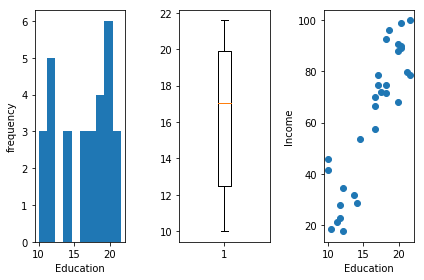

In [7]:
descriptivePlot(incomeData,'Education','Income')

The histogram plot indicates that the Education data is not really normally distibuted. The scatter plot of Education vs Income shows that there is a linear relationship between the two. We would expect here that the Education will be a dominant predictor for Income.

##### Descriptive graphs for Seniroity with respect to Income

Descriptive plots for the Seniority independant variable
The correlation coef is : 0.5182881203612878


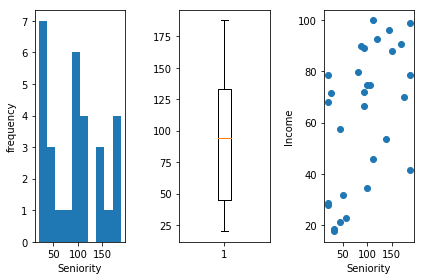

In [8]:
descriptivePlot(incomeData,'Seniority','Income')

The histogram plot indicates that the Seniority data is not really normally distibuted. The scatter plot of Seniority vs Income shows that there is a linear relationship between the two but there is alot of variance in this relationship (i.e. it does not form a tight line). We would expect that Seniority can play a role in the prediction of Income, however the relationship is not as clear as for Education.

#### Answer 1-5

In [9]:
# using statmodels use an oridnary least sqaure linear model 
incomeModel = smf.ols(formula='Income ~ Education', data = incomeData)
modelResult = incomeModel.fit()
modelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     120.8
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           1.15e-11
Time:                        19:03:25   Log-Likelihood:                -115.90
No. Observations:                  30   AIC:                             235.8
Df Residuals:                      28   BIC:                             238.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -41.9166      9.769     -4.291      0.000     -61.927     -21.906
Education      6.3872      0.581     10.990      0.000       5.197       7.578
==============================================================================
Omnibus:                        0.561   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.652
Skew:                           0.140   Prob(JB):                        0.722
Kurtosis:                       2.335   Cond. No.                         75.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The independant variable here is Education (feature of the model) and the dependant variable is Income (target variable). Hence, we are trying to predict Income (dependant variable) based on the values of Education (independant variable).

The model used here is a linear model, sine the relationship as seen in the scatter plot priovously between Education and Income is visually linear. A least squares approach is used here to find the coefficnts of the linear model b0 + b1X.

The R2 value of the model 0.812 indicates that the choice of a linear model is appropriate. It indicates that close to 80% of the variance of the data is explained by ou simple linear model.

#### Answer 1-6

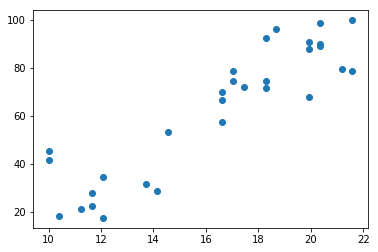

In [10]:
plt.scatter(incomeData['Education'], incomeData['Income'])

As mentioned previously the scatter plot of the independant and the dependant variables shows a linear relationship. Hence, the choice of a linear model is appropriate. As mentioned the linear model seems to explain a good portion of the variance since the R2 value is 0.812

#### Answer 1-7

In [11]:
# get the standard error from the model
stdError = modelResult.bse['Education']

In [12]:
# get the slope of the model
slope = modelResult.params['Education']

In [13]:
# calculate the confidence intervsl which 2 times the standard error
confInt = stdError* 2

In [14]:
print('The slope of the model line is : ' + str(slope))
print('The 95% confidence interval is +- 2 * standerror : '+str(confInt))

The slope of the model line is : 6.387161217198068
The 95% confidence interval is +- 2 * standerror : 1.1623431001539102


#### Answer 1-8

In [15]:
# make the same model as above however using the sklearn library
incomeModelSK = LinearRegression()

# feature variable X
X = incomeData[['Education']]

# target variable y
y = incomeData['Income']

# fit the model and feed the data
incomeModelSK.fit(X =X, y=y)

# predict values of the model based on the known features
predCurve = incomeModelSK.predict(X);

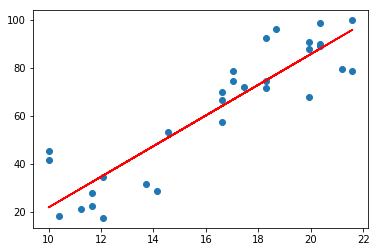

In [16]:
# plot the data that we are modeling
plt.scatter(X, y)

# plot the predicted curve of the model
plt.plot(X, predCurve, "-r");

We can see from the plot of the model and the raw data that the model is pretty good at explaining the overall trend.

#### Answer 1-9

In [17]:
# get the values that corresponds to the 25 and 75 percentiles of the Education data
percentile_25 = np.percentile(incomeData['Education'],q=25)
percentile_75 = np.percentile(incomeData['Education'],q=75)

print('The 25 percentile is : ' + str(percentile_25))
print('The 75 percentile is : ' + str(percentile_75))

scale = (percentile_75-percentile_25)


# generate 10 education values from the unifirm distribution with a range between the 25 and 75 percentile values
print('Generated education values')
educationValues = stats.uniform.rvs(size=10, loc = percentile_25, scale=scale)
educationValues

The 25 percentile is : 12.482758620689674
The 75 percentile is : 19.9310344827586
Generated education values


array([12.57695416, 15.85021378, 19.14547393, 12.9700032 , 17.06785262,
       14.17818408, 12.64755414, 13.45034336, 19.18694293, 17.72324079])

In [18]:
# for the values generated above calculate the predicted values of income based on the  model
predIncome = incomeModelSK.predict(educationValues.reshape(-1, 1))
print('Predicted income values for the generated education values')
predIncome

Predicted income values for the generated education values


array([38.41442166, 59.32125855, 80.36861639, 40.92488922, 67.0985141 ,
       48.6417353 , 38.86535507, 43.99289928, 80.63348557, 71.28458404])

In [19]:
# combine the results in a dataframe for tabulating the results
result = pd.DataFrame({'Education': educationValues,'Pred Income': predIncome})
result

,Education,Pred Income
0,12.576954,38.414422
1,15.850214,59.321259
2,19.145474,80.368616
3,12.970003,40.924889
4,17.067853,67.098514
5,14.178184,48.641735
6,12.647554,38.865355
7,13.450343,43.992899
8,19.186943,80.633486
9,17.723241,71.284584


#### Answer 1-10

In [20]:
# initialize the model first using the sk learn
incomeModel_EduAndSeniority = LinearRegression();

# get the feature data
X = incomeData[['Education','Seniority']]

# get the traget data
y = incomeData['Income']

# fit the model with the feature and target data
incomeModel_EduAndSeniority.fit(X=X, y=y);

predIncome__EduAndSeniority = incomeModel_EduAndSeniority.predict(X);

r2 = r2_score(y,predIncome__EduAndSeniority);
print('The R2 of the model is : ' + str(r2))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The R2 of the model is : 0.9341035446679532


The model has two coefficients (ie Education and Seniority) to predict the Income. The model is linear and has the form  = b0 + b1 * Education + b2 * Seniority.

The R2 of the model is 0.93, which is an improvement over the previous model which had and R2 of 0.812. Hence, the addition of the Seniority has improved the prediction of the Income.


#### Answer 1-11 

In [21]:
# regression parameters intercept is beta0 and coef_ is beta1
print('The intercept of the model is : ' + str(incomeModel_EduAndSeniority.intercept_))
print('Coefficient of Education is : ' + str(incomeModel_EduAndSeniority.coef_[0]))
print('Coefficient of Seniority is : ' + str(incomeModel_EduAndSeniority.coef_[1]))

The intercept of the model is : -50.08563875473375
Coefficient of Education is : 5.89555596095109
Coefficient of Seniority is : 0.17285546935048077


#### Answer 1-12

In [22]:
predValue = incomeModel_EduAndSeniority.intercept_ +  incomeModel_EduAndSeniority.coef_[0]*18 + incomeModel_EduAndSeniority.coef_[1]*60
print('The predicited value for 18 years of education and 60 yrs of seniority is : '+ str(predValue))

The predicited value for 18 years of education and 60 yrs of seniority is : 66.40569670341472


#### Answer 1-13

Education is a stronger predictor of Income since it has a stronger correlation coefficient 0.9 then Senioirty which has a correlation coefficient of 0.5. The strong linear relationship seen in the scatter plot of Education vs Income (tight line with positive relationship) also testifies that Education is a stronger predictor.

## Question 2 <span style="color:red">(30 points)</span>

1.  Download `Credit.csv` from http://www-bcf.usc.edu/~gareth/ISL/Credit.csv
2.  Load the data into this Jupyter notebook. 
3.  Describe the data using descriptive statistics such as measures of central tendancy, dispersion or association.
4.  Explore the data by vizualing it through various figures. Clearly explain or interpret each figure, justify the appropriateness of the tool used for visualization, highlight the information it provides, and, finally, explain how this information affect your further analysis.
5.  Which variables of this dataset are **qualitative** and which ones are **quantitative**? Create an attribute (also called design) matrix  $\mathbf{X}$ that includes only the following attributes:`Income`, `Limit`, `Rating`, `Cards`, `Age`, and `Education`.
6.  Create a binary variable `Balance_1500` which equals $1$ for each observation if `Balance` $> 1500$ for that observation and equals $0$ otherwise.
7.  Model `Balance_1500` by the explanatory variables mentionned in Step 5 using the following models: 
    + logistic regression, 
    + linear discriminant, and 
    + quadratic discriminant.
8. Interpret the coefficients of `Income`, `Age`, and `Education` for the logistic regression model.    
9. Find the probability of (`Balance` $> 1500$), for the following values, using all three aforementionned methods:

|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   | 
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

    Compare the probabilities and comment.
    
10. For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment. 
11. Plot the ROC Curve of the three methods on the same figure. Comment.

#### Answer 2-1 and 2-2

In [23]:
# load the credi data
creditData = pd.read_csv('Credit.csv')

# remove the first column
creditData = creditData.iloc[:,1:]

# display the data
creditData.head(10)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


#### Answer 2-3

In [24]:
# get the values of central tendency and dispersion
creditData.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [25]:
# get the values of association (i.e. correlation)
creditData.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


By examing the correlation table we can see that Limit and Rating are highly correlated to the Balance. The Income comes in thrid position.

#### Answer 2-4

##### Descriptive graphs for Income with respect to Balance

Descriptive plots for the Income independant variable
The correlation coef is : 0.46365645701575736


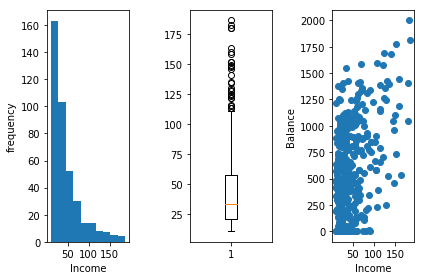

In [26]:
descriptivePlot(creditData,'Income','Balance')

The Income data set is skewed to the left and has several outliers. The scatter plot indicates that an increase in Income will increase the Balance, however note that there is quite a bit of variance in the relationship. The correlation coefficient is 0.435, so there is a relationship but it is not the strongest. The Income should be somewhat significant in the model

##### Descriptive graphs for Limit with respect to Balance

Descriptive plots for the Limit independant variable
The correlation coef is : 0.8616972670153951


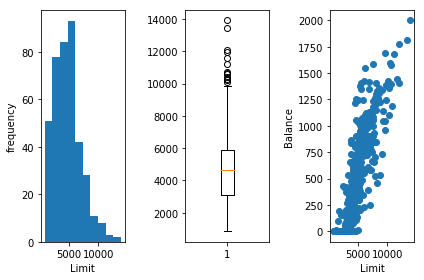

In [27]:
descriptivePlot(creditData,'Limit','Balance')

The Limit data is more normally distibuted, however it is still skewed to the left. The boxplot shows some outliers. The scatter plot shows that the Limit to Balance relationship is relatively strong as does the correlation coefficient of 0.86. Hence Limit should be very significant in the model.

##### Descriptive graphs for Rating with respect to Balance

Descriptive plots for the Rating independant variable
The correlation coef is : 0.863625160621495


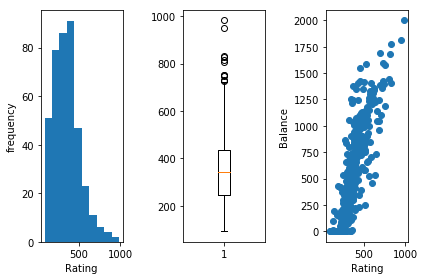

In [28]:
descriptivePlot(creditData,'Rating','Balance')

The Rating data is normally distributed. The boxplot shows few outliers. The scatter plot indicates and the correlation coefficient 0.86 show a strong relationship with the Balance. Hence the Rating variable should be very significant in the model.

##### Descriptive graphs for Cards with respect to Balance

Descriptive plots for the Cards independant variable
The correlation coef is : 0.08645634741861911


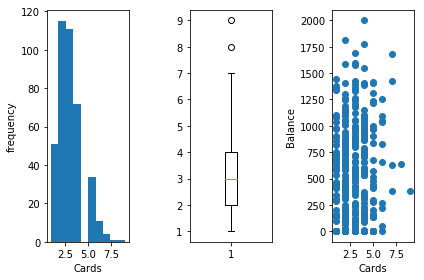

In [29]:
descriptivePlot(creditData,'Cards','Balance')

The Cards data is normally distributed. The scatter plot and the correlation coefficient of 0.086 do not show a strong relationship with the Balance. Hence the Cards variable should not be significant in the model.

##### Descriptive graphs for Age with respect to Balance

Descriptive plots for the Age independant variable
The correlation coef is : 0.0018351188590736563


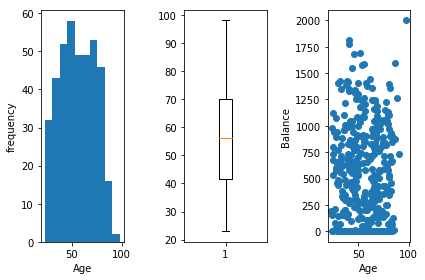

In [30]:
descriptivePlot(creditData,'Age','Balance')

The Age data is normally distributed. The scatter plot and the correlation coefficient of 0.002 do not show a strong relationship with the Balance. Hence the Age variable should not be significant in the model.

##### Descriptive graphs for Education with respect to Balance

Descriptive plots for the Education independant variable
The correlation coef is : -0.00806157645355343


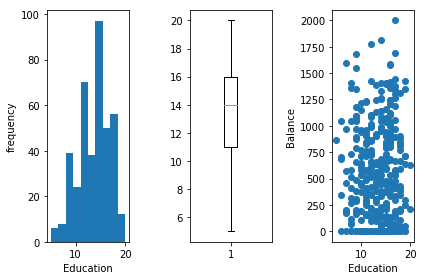

In [31]:
descriptivePlot(creditData,'Education','Balance')

The Education data is normally distributed. The scatter plot and the correlation coefficient of -0.008 do not show a strong relationship with the Balance. Hence the Education variable should not be significant in the model.

##### Descriptive graph for the qualitative data Ethnicity, Gender, Student and Married

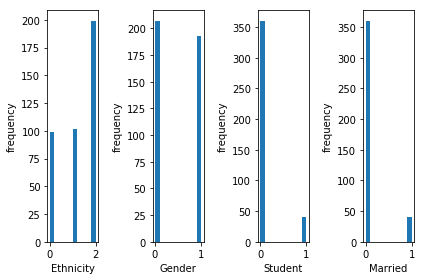

In [32]:
labelencoder = LabelEncoder()
plt.subplot(1,4,1)
ethnicity = labelencoder.fit_transform(creditData['Ethnicity'])
plt.hist(ethnicity);
plt.ylabel('frequency');
plt.xlabel('Ethnicity');
plt.subplot(1,4,2)
gender = labelencoder.fit_transform(creditData['Gender'])
plt.hist(gender);
plt.ylabel('frequency');
plt.xlabel('Gender');
plt.subplot(1,4,3)
student = labelencoder.fit_transform(creditData['Student'])
plt.hist(student);
plt.ylabel('frequency');
plt.xlabel('Student');
plt.subplot(1,4,4)
married = labelencoder.fit_transform(creditData['Married'])
plt.hist(student);
plt.ylabel('frequency');
plt.xlabel('Married');
plt.tight_layout();

The follwing grafs show the histograms for the qualatative data of Ethnicity, Gender, Student and Married.

#### Answer 2-5

The Income, Limit, Rating, Cards, Age and Education are quantative values. As for Ethnicity, Gender, Student and Married are qualatative values.

In [33]:
X = creditData[['Income','Limit','Rating','Cards','Age','Education']]
X.head()

,Income,Limit,Rating,Cards,Age,Education
0,14.891,3606,283,2,34,11
1,106.025,6645,483,3,82,15
2,104.593,7075,514,4,71,11
3,148.924,9504,681,3,36,11
4,55.882,4897,357,2,68,16


#### Answer 2-6

In [34]:
# using the np.where method create the binary value for all values >= 1500
Balance_1500 = np.where(creditData['Balance']>=1500, 1, 0)

#### Answer 2-7

In [35]:
# create the logistic model
y = Balance_1500
creditModelLogistic = LogisticRegression();
creditModelLogistic.fit(X, y);

/Users/vince/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
# create the LDA model
creditModelLDA = LinearDiscriminantAnalysis()
creditModelLDA.fit(X,y);

In [37]:
# create the QDA model
creditModelQDA = QuadraticDiscriminantAnalysis()
creditModelQDA.fit(X,y);

#### Answer 2-8

In [38]:
incomeCoef = creditModelLogistic.coef_[0,0]
ageCoef = creditModelLogistic.coef_[0,4]
educationCoef = creditModelLogistic.coef_[0,5]

print('The income coeficient is : ' + str(incomeCoef))
print('The age coeficient is : ' + str(ageCoef))
print('The education coeficient is : ' + str(educationCoef))


The income coeficient is : -0.009467993920739192
The age coeficient is : -0.05982423506658512
The education coeficient is : -0.35430612857899785


The Income, Age, and Education are all negative. As demonstrated below when we increase the value of these variables it increases the probability of having a balance over 1500

##### Case - increasing value of income.

In three data sets below we have kept all values equal, however we have increased income in 20 unit increments. As can be seen this has the effect of increasing the probability of exceeding 1500 balance.

In [39]:
# increasing values of income
val = np.array([[60,8000,600,3,30,14],[80,8000,600,3,30,14],[100,8000,600,3,30,14],[120,8000,600,3,30,14]])
predCredit = creditModelLogistic.predict_proba(val)
print(predCredit[:,0])

[0.96145235 0.96788872 0.97328027 0.97778733]


##### Case - increasing value of age.

In three data sets below we have kept all values equal, however we have increased age in 10 unit increments. As can be seen this has the effect of increasing the probability of exceeding 1500 balance.

In [40]:
# increasing values of income
val = np.array([[60,8000,600,3,30,14],[60,8000,600,3,40,14],[60,8000,600,3,50,14],[60,8000,600,3,60,14]])
predCredit = creditModelLogistic.predict_proba(val)
print(predCredit[:,0])

[0.96145235 0.97843309 0.98802675 0.9933817 ]


##### Case - increasing value of education.

In three data sets below we have kept all values equal, however we have increased education in 4 unit increments. As can be seen this has the effect of increasing the probability of exceeding 1500 balance.

In [41]:
# increasing values of income
val = np.array([[60,8000,600,3,30,8],[60,8000,600,3,30,12],[60,8000,600,3,30,16],[60,8000,600,3,30,20]])
predCredit = creditModelLogistic.predict_proba(val)
print(predCredit[:,0])

[0.74851599 0.92469641 0.98064315 0.99523834]


#### Answer 2-9

In [42]:
val = np.array([[63,8100,600,4,30,13],[186,13414,950,2,41,13],[63,8500,600,4,30,13]])
predCredit = creditModelLogistic.predict_proba(val)
print(predCredit[:,0])

[0.90640832 0.17333365 0.56681143]


By playing with the values above we can see that the limit will decrease dramatically the probability of balance over 1500. Just a small increase in the limit has an important decrease in the proability.

#### Answer 2-10

##### Performance of the Logistic Regression

In [43]:
# Logistic performance
y_pred = creditModelLogistic.predict(X)
confMat = confusion_matrix(y, y_pred)
accScore = accuracy_score(y, y_pred)
logAUC = roc_auc_score(y, y_pred)

print('Results for the Logistic Regression')
print('This is the confusion matrix')
print(confMat)
print('This is the accuracy score : ' + str(accScore))
print('This is the AUC:%.3f'% logAUC)

Results for the Logistic Regression
This is the confusion matrix
[[390   1]
 [  6   3]]
This is the accuracy score : 0.9825
This is the AUC:0.665


##### Performance of the Linear Discriminant

In [44]:
# Linear Discriminant performance
y_pred = creditModelLDA.predict(X)
confMat = confusion_matrix(y, y_pred)
accScore = accuracy_score(y, y_pred)
logAUC = roc_auc_score(y, y_pred)

print('Results for the Linear Discriminant')
print('This is the confusion matrix')
print(confMat)
print('This is the accuracy score : ' + str(accScore))
print('This is the AUC:%.3f'% logAUC)

Results for the Linear Discriminant
This is the confusion matrix
[[383   8]
 [  4   5]]
This is the accuracy score : 0.97
This is the AUC:0.768


##### Performance of the Quadratic Discriminant

In [45]:
# Quadratic Discriminant performance
y_pred = creditModelQDA.predict(X)
confMat = confusion_matrix(y, y_pred)
accScore = accuracy_score(y, y_pred)
logAUC = roc_auc_score(y, y_pred)

print('Results for the Quadratic Discriminant')
print('This is the confusion matrix')
print(confMat)
print('This is the accuracy score : ' + str(accScore))
print('This is the AUC:%.3f'% logAUC)

Results for the Quadratic Discriminant
This is the confusion matrix
[[390   1]
 [  2   7]]
This is the accuracy score : 0.9925
This is the AUC:0.888


By examining the confusion matrix of the three models we can see that the Quadratic Discriminant model is the best of the three since it has the least amount of false positives and false negatives. The AUC also puts the Quadratic Disciminant model ahead and the Linear Discrimant in second place. However the accuracy score puts the QDA in first and the Logistic in second. 

#### Answer 2-11

##### ROC corve for the Logistic Regression

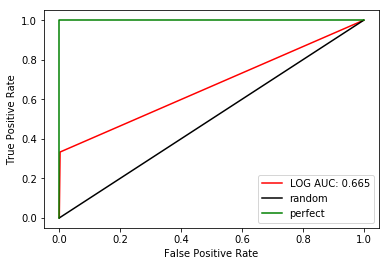

In [53]:
y_pred = creditModelLogistic.predict(X)
log_fpr, log_tpr, log_thresholds = roc_curve(y, y_pred)
log_AUC = roc_auc_score(y, y_pred)

plt.plot(log_fpr, log_tpr,'r-',label = 'LOG AUC: %.3f'%log_AUC)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

##### ROC corve for the Linear Discriminant

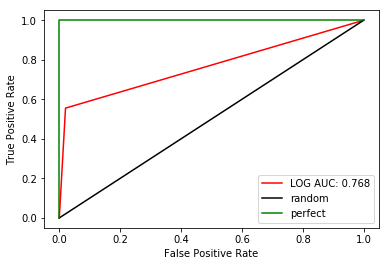

In [54]:
y_pred = creditModelLDA.predict(X)
log_fpr, log_tpr, log_thresholds = roc_curve(y, y_pred)
log_AUC = roc_auc_score(y, y_pred)

plt.plot(log_fpr, log_tpr,'r-',label = 'LOG AUC: %.3f'%log_AUC)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [55]:
##### ROC corve for the Quadratic Discriminant

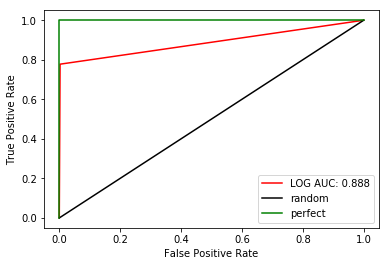

In [56]:
y_pred = creditModelQDA.predict(X)
log_fpr, log_tpr, log_thresholds = roc_curve(y, y_pred)
log_AUC = roc_auc_score(y, y_pred)

plt.plot(log_fpr, log_tpr,'r-',label = 'LOG AUC: %.3f'%log_AUC)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

We can see that the QDA is the one that has the highest area under the curve. It is the only one that comes close to the perfoect curve. The LDA is in second place.

## Question 3 <span style="color:red">(30 points)</span>

1. From the dataset `Credit.csv`, extract the variable `Student` and save it as `Student`. 
2. Save the number of observations in `Student` as `population_size`.
3. Factorize `Student` and compute the proportion of "students" and save it as `true_p`. 

Let us consider the following simple logistic regression model

$$ \mathrm{Pr}(\mathrm{Student = Yes}) = \frac{e^{\beta}}{1 + e^{\beta}}. $$

Here, we do not consider any predictor. The objective is to estimate $\beta$ by manipulating the likelihood of the model.

4. Define a variable `sample_size` $=100$. Now, sample `sample_size` number of observations from `Student` and call it `sample`.
5. Define a function called `likelihood` which takes one argument `beta` and computes the likelihood of `beta` based on the `sample`.  
6. Randomly generate $50$ numbers from the **continuous uniform** distribution $U[-5;5]$. Save these numbers as `beta_candidate`.
7. Using the `likelihood` function defined in Step 5, compute the likelihood of `beta_candidate` and save it as `likelihood_candidate`. Plot the `likelihood_candidate` versus `beta_candidate`.
8. Based on the plot, which value of `beta_candidate` would you choose as the estimate of $\beta$ ? Explain why.
9. Based on the chosen `beta_candidate`, estimate the `true_p` (or $\mathrm{Pr}(\mathrm{Student = Yes})$ ).

#### Answer 3-1

In [57]:
# get the student column from the credit data
Student = creditData.Student

#### Answer 3-2

In [58]:
# get the population size
population_size = Student.size
print('Population size is : ' + str(population_size))

Population size is : 400


#### Answer 3-3

In [59]:
# convert the data to 1 for student and 0 for non student
labelencoder = LabelEncoder()
Student = labelencoder.fit_transform(Student)

In [60]:
true_p = Student.sum()/Student.size
print('Proportion of students is : ' + str(true_p))

Proportion of students is : 0.1


#### Answer 3-4

In [61]:
sample_size = 100

In [62]:
# sample the Student population
np.random.seed(3)
sampleStudents = np.random.choice(a=Student, size=sample_size)
sampleStudents

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

#### Answer 3-5

In [63]:
def pr(beta):
    """
    This function calculates the Pr based on a beta value
    """
    result = math.exp(beta)/(1+math.exp(beta))
    return result

In [64]:
def likelihood(beta,sample):
    """
    Function that calculates the likelihood
    """
    
    # get the number of student and number of non student  
    numStudents = np.where(sampleStudents==1)[0].size
    numNonStudents = np.where(sampleStudents==0)[0].size
    
    # calculate the likelihood based on equation in the ISL book on page 133
    result = pr(beta)**numStudents*(1-pr(beta))**numNonStudents
    
    return result


#### Answer 3-6

In [65]:
# get the beta candidates from the uniform distribution for values between -5 to 5
beta_candidate = stats.uniform.rvs(size=50, loc =-5, scale=10)
beta_candidate

array([ 1.91477511,  1.50476858,  2.23939139, -0.24911389,  0.96663775,
       -4.33030576, -4.27437862, -3.01023974, -3.48139003, -3.99895655,
       -3.70706135,  0.53277732, -3.12185175,  4.52101243,  1.81611779,
        0.41019673,  2.07180601, -2.36113329,  4.26725684,  3.39193058,
        2.26319498, -0.19760044,  3.42103186,  2.44752323,  1.60325906,
        4.13975267,  1.33665564, -1.34059415,  0.52844573, -3.03619423,
       -3.07927704,  2.25669624,  2.84936703,  4.72098364,  3.50971417,
        0.43594327, -4.1020913 , -0.11126755,  4.27936348,  2.876182  ,
       -0.14905774, -0.44720639, -2.82014232, -3.22786619, -4.26376331,
        3.92393188,  1.40176617, -3.56667683, -0.8587308 , -4.50891076])

#### Answer 3-7

In [66]:
# create the vector to store the results
likelihood_candidate = []

# iterate over each value of beta and calculate the likelihood and store in a vector
for beta in beta_candidate:
    
    likelihood_candidate.append(likelihood(beta,sampleStudents))
    

In [67]:
# put the result in a dataframe and get the min and max of the likelihood values for axis plotting scale 
res = pd.DataFrame({'beta':beta_candidate,'likeli':likelihood_candidate})
minY = res['likeli'].min()
maxY = res['likeli'].max()

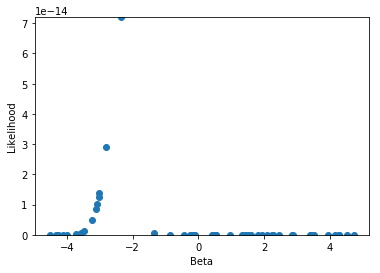

In [68]:
# plot the data
plt.scatter(res['beta'], res['likeli']);
plt.ylim(minY, maxY);
plt.xlabel('Beta');
plt.ylabel('Likelihood');

#### Answer 3-8 

From the plot we are looking for the beta value that produces the max likelihood value (ie argmax value) of the likelihood. The argmax is at about -2.2

#### Answer 3-9

In [69]:
beta_max = -2.2

In [70]:
# Pr for beta_max
print('Pr for '+ str(beta_max) + ' is : ' + str(pr(beta_max)))

Pr for -2.2 is : 0.09975048911968513


This is very close to the proportion of students calulated earlier